In [46]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [47]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [48]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
# Converting string values into ints

In [51]:
# Converting hotel types from str to int

df.hotel = df.hotel.map({'City Hotel':0, 'Resort Hotel':1})
df.hotel.unique()

array([1, 0], dtype=int64)

In [52]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [53]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [54]:
df['weekday'] = df['date'].dt.weekday

In [55]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [56]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [57]:
# Converting country from str to int using LabelEncoder

df.country = df.country.fillna('O')     # Filling Null values for the LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df.country.unique()

array([136,  59, 170,  51,  76,  56, 127, 140, 124, 128,   6, 134,  43,
        15,  29,  34,  66,  81, 123,  46, 141, 155,  11,  52,  42,  25,
        54, 113,  27, 100, 154,   3,  75,  31, 107, 103, 167, 149, 101,
       135, 150,  30,  12,  23,  99, 163, 175,   1,  80,  40, 176,  37,
       177,  48,  91,  38,  72,   5, 162,  82,  71,  69,  77,  60,   4,
        63, 169,  83,  28,  41,  35,  61,  92, 121, 106, 172, 153,  55,
        86, 129,  73,  94, 132, 145, 156,  13,  20, 126, 159,  47, 108,
       117,   7,  85,  98,  39,  33,  22, 115,  36, 152, 166,  19,  32,
        84, 157, 146,  14, 143, 174, 133, 139,  50, 131, 110, 116,  49,
       105,  79, 171, 125,  21, 102, 158, 164,  44, 151,  90,  53,  78,
        70, 142,  88, 104,  18,  74, 160, 122,  16, 173, 165,  58,  62,
       161,  64,  87,  97,  65, 112, 168, 118,  57, 111, 130,  17,  95,
       109, 119,  24, 137,  26,   0,   2, 148,  45, 138,  68,  96,   9,
        67,   8, 114, 120,  89, 144,  10, 147,  93])

In [58]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [59]:
# Converting market_segment from str to int

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])
df.market_segment.unique()

array([3, 2, 6, 5, 1, 4, 7, 0])

In [60]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [61]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})
df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [62]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [63]:
# Converting reserved_room_type from str to int

le = LabelEncoder()
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df.reserved_room_type.unique()

array([2, 0, 3, 4, 6, 5, 7, 8, 9, 1])

In [64]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [65]:
# Converting assigned_room_type from str to int

le = LabelEncoder()
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df.assigned_room_type.unique()

array([ 2,  0,  3,  4,  6,  5,  8,  1,  7, 11, 10,  9])

In [66]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [67]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [68]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [69]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})
df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [70]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [71]:
# Converting reservation_status from str to int

df.reservation_status = df.reservation_status.map({'No-Show':0, 'Check-Out':1, 'Canceled':2})
df.reservation_status.unique()

array([1, 2, 0], dtype=int64)

In [72]:
df.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [73]:
# Filling missing values with 0

df.children = df.children.fillna(0)
df.children = df.children.astype(int)

df.agent = df.agent.fillna(0)
df.agent = df.agent.astype(int)

df.company = df.company.fillna(0)
df.company = df.company.astype(int)

df.adr = df.adr.astype(int)

In [74]:
# Adults, babies and children cant be 0 at same time, so these rows have to be dropped

ghost_filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~ghost_filter]

<AxesSubplot:>

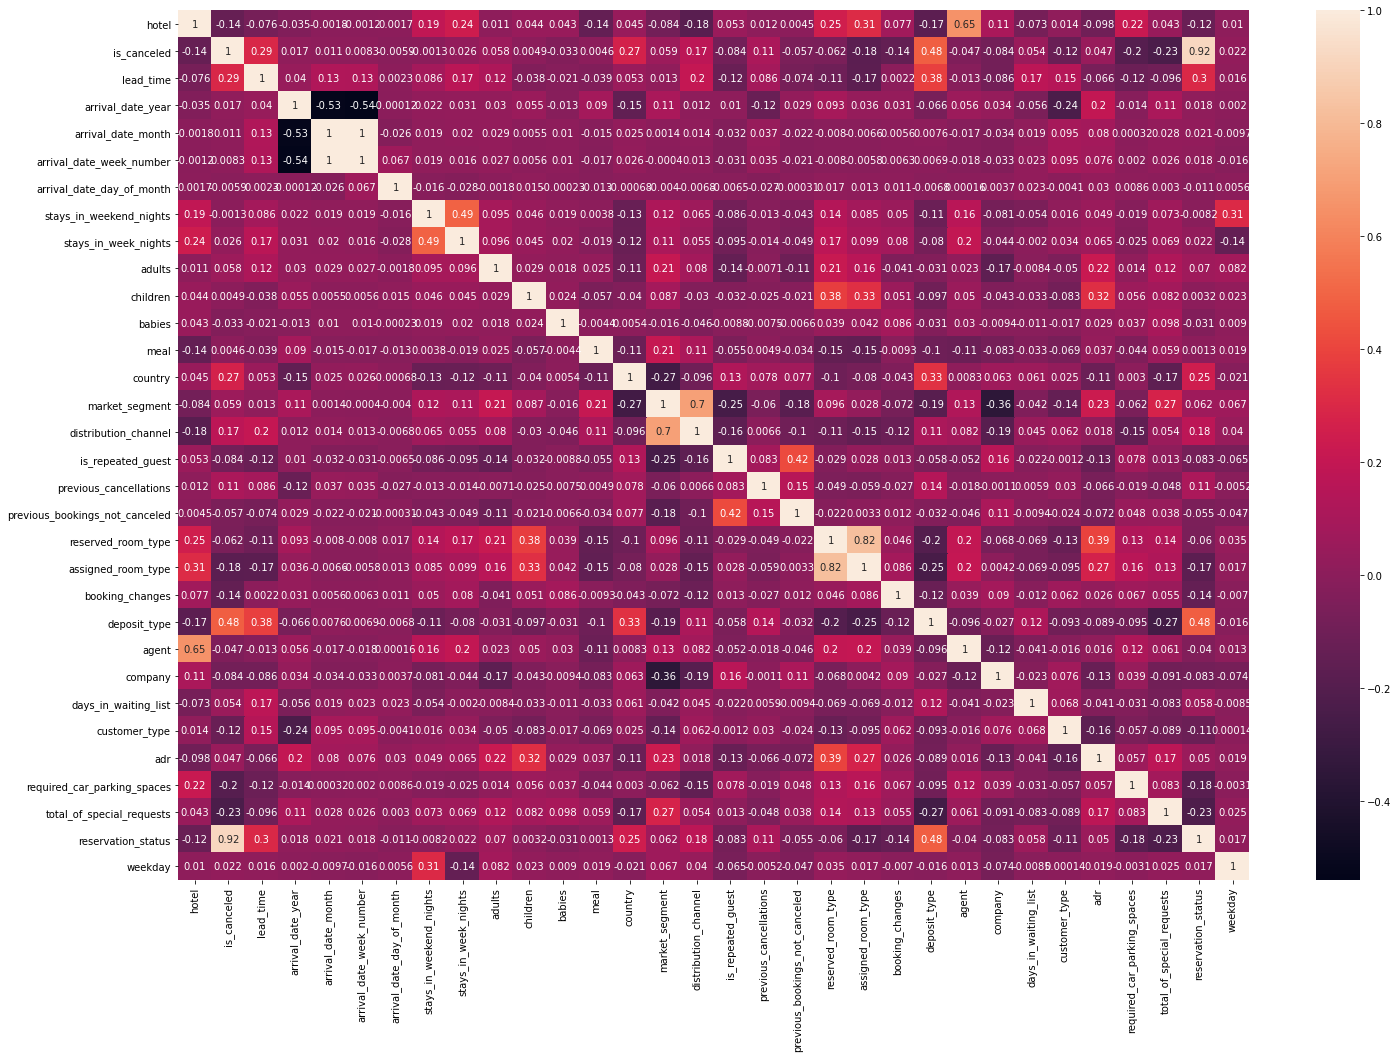

In [75]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [76]:
#Variance of the data
df.var()

hotel                                 0.223085
is_canceled                           0.233300
lead_time                         11422.361808
arrival_date_year                     0.500535
arrival_date_month                    9.546842
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
meal                                  0.801927
country                            2033.494119
market_segment                        1.602172
distribution_channel                  0.458395
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
reserved_room_type                    2.874866
assigned_room_type                    3.476675
booking_chang

In [77]:
# Correlation depending on is_canceled
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
reservation_status                0.917176
deposit_type                      0.480483
lead_time                         0.292876
country                           0.269327
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
assigned_room_type                0.175843
distribution_channel              0.171416
booking_changes                   0.144832
hotel                             0.137082
customer_type                     0.122024
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
reserved_room_type                0.062216
market_segment                    0.059419
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046858
agent                             0.046770
babies                            0.032569
stays_in_we

In [89]:
features

['is_canceled', 'reservation_status']

In [104]:
abs(df.corr()['is_canceled'][abs(df.corr()['is_canceled']) > 0.1]).drop(['is_canceled', 'reservation_status']).index.tolist()

['hotel',
 'lead_time',
 'country',
 'distribution_channel',
 'previous_cancellations',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'customer_type',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
vals = [0.005, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2]
y = df['is_canceled']

# Preparing empty lists for next loop
val_list, features_list, accuracy_list, kappa_list = [], [], [], []

# Loop for automatic prediction using the best found methods for this dataset: Random Forest, XgBoost, Cat, Extra Trees
for val in vals:
    features = abs(df.corr()['is_canceled'][abs(df.corr()['is_canceled']) > val]).drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'date']).index.tolist()
    val_list.append(val)
    features_list.append(features)

    # X = df.drop(columns = ['is_canceled', 'reservation_status', 'date'])
    X = df
    X = X[features]

    X_scaled = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 4)
    
    # Random Forest
    model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
    model_rf_prediction = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, model_rf_prediction)
    kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
    
    # XgBoost Classifier
    model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
    model_xgb_prediction = model_xgb.predict(X_test)
    accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
    kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)

    # Cat Boost Classifier
    model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
    model_cat_prediction = model_cat.predict(X_test)
    accuracy_cat = accuracy_score(y_test, model_cat_prediction)
    kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)

    # Extra Trees Classifier
    model_etc = ExtraTreesClassifier().fit(X_train, y_train)
    model_etc_prediction = model_etc.predict(X_test)
    accuracy_etc = accuracy_score(y_test, model_etc_prediction)
    kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)

    accuracy_list.append(accuracy_rf, accuracy_xgb, accuracy_cat, accuracy_etc)
    kappa_list.append(kappa_rf, kappa_xgb, kappa_cat, kappa_etc)

    # Control: Is the loop still running?
    print(val)

In [ ]:
df_loop_result = pd.concat(val_list, features_list, accuracy_list, kappa_list)
df_loop = pd.DataFrame(list(zip(val_list, features_list, accuracy_list, kappa_list)),
               columns =['Val', 'Features', Accu])

               NAME?

In [114]:
# vals = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2]
# y = df['is_canceled']

# for val in vals:
#     features = abs(df.corr()['is_canceled'][abs(df.corr()['is_canceled']) > val]).drop(['is_canceled', 'reservation_status']).index.tolist()
#     features

#     # X = df.drop(columns = ['is_canceled', 'reservation_status', 'date'])
#     X = df
#     X = X[features]

#     X_scaled = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 4)
    
#     print('Val: ' + str(val))
#     print('Features: ' + str(features) + '\n')

#     # Random Forest
#     model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
#     model_rf_prediction = model_rf.predict(X_test)
#     accuracy_rf = accuracy_score(y_test, model_rf_prediction)
#     kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
    
#     print('Random Forest')
#     print('Accuracy: '+ str(accuracy_rf))
#     print('Kappa: ' + str(kappa_rf) + '\n')

#     # XgBoost Classifier
#     model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
#     model_xgb_prediction = model_xgb.predict(X_test)
#     accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
#     kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)

#     print('XgBoost Classifier')
#     print('Accuracy: '+ str(accuracy_xgb))
#     print('Kappa: ' + str(kappa_xgb) + '\n')

#     # Cat Boost Classifier
#     model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
#     model_cat_prediction = model_cat.predict(X_test)
#     accuracy_cat = accuracy_score(y_test, model_cat_prediction)

#     # Extra Trees Classifier
#     model_etc = ExtraTreesClassifier().fit(X_train, y_train)
#     model_etc_prediction = model_etc.predict(X_test)
#     accuracy_etc = accuracy_score(y_test, model_etc_prediction)



Features: ['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_week_nights', 'adults', 'babies', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'weekday']
Val: 0.005
Decision Tree
Accuracy: 0.8560523446019629
Kappa: 0.6923214996426224

Features: ['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'stays_in_week_nights', 'adults', 'babies', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_typ

In [33]:
# CANCELLATION PREDICTION - ALL DATA BUT WITHOUT RESERVATION_STATUS

In [34]:
X = df.drop(['is_canceled'], axis = 1)
y = df['is_canceled']
y = np.array(y)

In [35]:
# Scaling

X_scaled = StandardScaler().fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [37]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Logistic Regression is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Logistic Regression is : 0.7337471688616727
Confusion Matrix : 
[[13043  1868]
 [ 4480  4451]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.87      0.80     14911
           1       0.70      0.50      0.58      8931

    accuracy                           0.73     23842
   macro avg       0.72      0.69      0.69     23842
weighted avg       0.73      0.73      0.72     23842

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.39634372650197336

Feature: 0, Score: -0.05401
Feature: 1, Score: 0.00695
Feature: 2, Score: -0.00164
Feature: 3, Score: -0.18844
Feature: 4, Score: 0.00881
Feature: 5, Score: 0.04102
Feature: 6, Score: 0.02025
Feature: 7, Score: -0.00459
Feature: 8, Score: 0.04023
Feature: 9, Score: 0.01493
Feature: 10, Score: 0.16952
Feature: 11, Score: 0.13413
Feature: 12, Score: -0.01589
Feature: 13, Score: 0.08883
Feature: 14, Score: -0.09249
Feature: 15, Score: -0.08699
Feature: 16, Score: -0.12647
Feature: 17, Score: 0.28597
Feature: 18, Score: -0.00129
Feature: 19, Score: -0.00278
Feature: 20, Score: -0.00038
Feature: 21, Score: -0.13033
Feature: 22, Score: 0.00639
Feature: 23, Score: -0.06117
Feature: 24, Score: -0.22216
Feature: 25, Score: 0.04356


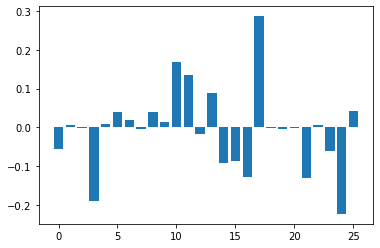

In [39]:
#Feature Importance

feature_lr = []

# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	feature_lr.append(v)	# This will be used later to predict the cancellation rate only for the top 15 features
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [40]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_lr)):
    if feature_lr[i]<0:
        feature_lr[i] = feature_lr[i]*(-1)

feature_lr = pd.DataFrame(feature_lr)
feature_lr.reset_index(inplace=True)
feature_lr.columns = ['feature', 'score']
feature_lr['feature_name'] = X.columns
feature_lr.sort_values(by=['score'], ascending = False, inplace=True)
feature_lr.reset_index(drop = True, inplace = True)
feature_lr

,feature,score,feature_name
0,17,0.285966,deposit_type
1,24,0.222156,total_of_special_requests
2,3,0.188441,arrival_date_month
3,10,0.169516,market_segment
4,11,0.134131,distribution_channel
5,21,0.130325,customer_type
6,16,0.126474,booking_changes
7,14,0.092485,previous_bookings_not_canceled
8,13,0.088828,previous_cancellations
9,15,0.086989,reserved_room_type


In [41]:
lr_top15_features = []
for i in range(15):
    lr_top15_features.append(feature_lr.feature_name[i])
lr_top15_features

['deposit_type',
 'total_of_special_requests',
 'arrival_date_month',
 'market_segment',
 'distribution_channel',
 'customer_type',
 'booking_changes',
 'previous_bookings_not_canceled',
 'previous_cancellations',
 'reserved_room_type',
 'required_car_parking_spaces',
 'hotel',
 'weekday',
 'stays_in_week_nights',
 'meal']

In [42]:
df_lr_top15 = X[lr_top15_features]
df_lr_top15

,deposit_type,total_of_special_requests,arrival_date_month,market_segment,distribution_channel,customer_type,booking_changes,previous_bookings_not_canceled,previous_cancellations,reserved_room_type,required_car_parking_spaces,hotel,weekday,stays_in_week_nights,meal
0,0,0,7,3,1,1,3,0,0,2,0,1,2,0,1
1,0,0,7,3,1,1,4,0,0,2,0,1,2,0,1
2,0,0,7,3,1,1,0,0,0,0,0,1,2,1,1
3,0,0,7,2,2,1,0,0,0,0,0,1,2,1,1
4,0,1,7,6,3,1,0,0,0,0,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,8,5,3,1,0,0,0,0,0,0,2,5,1
119386,0,2,8,6,3,1,0,0,0,4,0,0,3,5,1
119387,0,4,8,6,3,1,0,0,0,3,0,0,3,5,1
119388,0,0,8,6,3,1,0,0,0,0,0,0,3,5,1


In [43]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Decision Tree is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

Accuracy Score of Decision Tree is : 0.8555070883315158
Confusion Matrix : 
[[13171  1740]
 [ 1705  7226]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     14911
           1       0.81      0.81      0.81      8931

    accuracy                           0.86     23842
   macro avg       0.85      0.85      0.85     23842
weighted avg       0.86      0.86      0.86     23842



In [44]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.6918558664256318

Feature: 0, Score: 0.00276
Feature: 1, Score: 0.13156
Feature: 2, Score: 0.02869
Feature: 3, Score: 0.04038
Feature: 4, Score: 0.01839
Feature: 5, Score: 0.03098
Feature: 6, Score: 0.01083
Feature: 7, Score: 0.00084
Feature: 8, Score: 0.01204
Feature: 9, Score: 0.08247
Feature: 10, Score: 0.06483
Feature: 11, Score: 0.00268
Feature: 12, Score: 0.00139
Feature: 13, Score: 0.02326
Feature: 14, Score: 0.00604
Feature: 15, Score: 0.01326
Feature: 16, Score: 0.01618
Feature: 17, Score: 0.23597
Feature: 18, Score: 0.06146
Feature: 19, Score: 0.00413
Feature: 20, Score: 0.00205
Feature: 21, Score: 0.01667
Feature: 22, Score: 0.08080
Feature: 23, Score: 0.02367
Feature: 24, Score: 0.05418
Feature: 25, Score: 0.03449


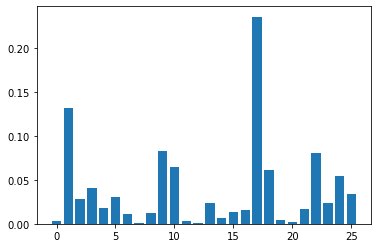

In [45]:
#Feature Importance

feature_dt = []

# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	feature_dt.append(v)	# This will be used later to predict the cancellation rate only for the top 15 features
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [46]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_dt)):
    if feature_dt[i]<0:
        feature_dt[i] = feature_dt[i]*(-1)

feature_dt = pd.DataFrame(feature_dt)
feature_dt.reset_index(inplace=True)
feature_dt.columns = ['feature', 'score']
feature_dt['feature_name'] = X.columns
feature_dt.sort_values(by=['score'], ascending = False, inplace=True)
feature_dt.reset_index(drop = True, inplace = True)

dt_top15_features = []
for i in range(15):
    dt_top15_features.append(feature_dt.feature_name[i])

df_dt_top15 = X[dt_top15_features]
df_dt_top15

,deposit_type,lead_time,country,adr,market_segment,agent,total_of_special_requests,arrival_date_month,weekday,stays_in_week_nights,arrival_date_year,required_car_parking_spaces,previous_cancellations,stays_in_weekend_nights,customer_type
0,0,342,136,0,3,0,0,7,2,0,2015,0,0,0,1
1,0,737,136,0,3,0,0,7,2,0,2015,0,0,0,1
2,0,7,59,75,3,0,0,7,2,1,2015,0,0,0,1
3,0,13,59,75,2,304,0,7,2,1,2015,0,0,0,1
4,0,14,59,98,6,240,1,7,2,2,2015,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,15,96,5,394,0,8,2,5,2017,0,0,2,1
119386,0,102,56,225,6,9,2,8,3,5,2017,0,0,2,1
119387,0,34,43,157,6,9,4,8,3,5,2017,0,0,2,1
119388,0,109,59,104,6,89,0,8,3,5,2017,0,0,2,1


Maximum:  0.9614093959731543
Mean:  0.8191395174980046


<AxesSubplot:>

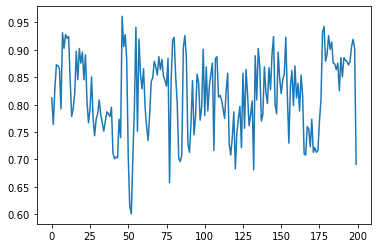

In [47]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =5), X, y, cv=25
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()


In [48]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

Accuracy Score of Ada Boost Classifier is : 0.7988004362050164
Confusion Matrix : 
[[12821  2090]
 [ 2707  6224]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     14911
           1       0.75      0.70      0.72      8931

    accuracy                           0.80     23842
   macro avg       0.79      0.78      0.78     23842
weighted avg       0.80      0.80      0.80     23842



In [49]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.5645543378914974

In [50]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.8917456589212315

In [51]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.7657748017829711

Feature: 0, Score: 0.00884
Feature: 1, Score: 0.14300
Feature: 2, Score: 0.02643
Feature: 3, Score: 0.04758
Feature: 4, Score: 0.02183
Feature: 5, Score: 0.03824
Feature: 6, Score: 0.01451
Feature: 7, Score: 0.00093
Feature: 8, Score: 0.01375
Feature: 9, Score: 0.12287
Feature: 10, Score: 0.05087
Feature: 11, Score: 0.01067
Feature: 12, Score: 0.00216
Feature: 13, Score: 0.03508
Feature: 14, Score: 0.00441
Feature: 15, Score: 0.01789
Feature: 16, Score: 0.02136
Feature: 17, Score: 0.12609
Feature: 18, Score: 0.05635
Feature: 19, Score: 0.00446
Feature: 20, Score: 0.00218
Feature: 21, Score: 0.02628
Feature: 22, Score: 0.08487
Feature: 23, Score: 0.02364
Feature: 24, Score: 0.05934
Feature: 25, Score: 0.03636


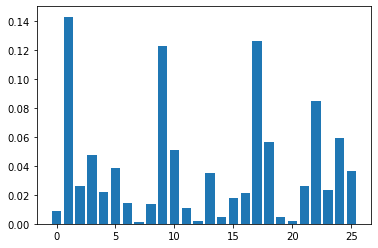

In [52]:
#Feature Importance

feature_rf = []

# get importance

importance = model_rf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	feature_rf.append(v)	# This will be used later to predict the cancellation rate only for the top 15 features
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_rf)):
    if feature_rf[i]<0:
        feature_rf[i] = feature_rf[i]*(-1)

feature_rf = pd.DataFrame(feature_rf)
feature_rf.reset_index(inplace=True)
feature_rf.columns = ['feature', 'score']
feature_rf['feature_name'] = X.columns
feature_rf.sort_values(by=['score'], ascending = False, inplace=True)
feature_rf.reset_index(drop = True, inplace = True)

rf_top15_features = []
for i in range(15):
    rf_top15_features.append(feature_rf.feature_name[i])

df_rf_top15 = X[rf_top15_features]
df_rf_top15

,lead_time,deposit_type,country,adr,total_of_special_requests,agent,market_segment,arrival_date_month,stays_in_week_nights,weekday,previous_cancellations,arrival_date_year,customer_type,required_car_parking_spaces,stays_in_weekend_nights
0,342,0,136,0,0,0,3,7,0,2,0,2015,1,0,0
1,737,0,136,0,0,0,3,7,0,2,0,2015,1,0,0
2,7,0,59,75,0,0,3,7,1,2,0,2015,1,0,0
3,13,0,59,75,0,304,2,7,1,2,0,2015,1,0,0
4,14,0,59,98,1,240,6,7,2,2,0,2015,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,0,15,96,0,394,5,8,5,2,0,2017,1,0,2
119386,102,0,56,225,2,9,6,8,5,3,0,2017,1,0,2
119387,34,0,43,157,4,9,6,8,5,3,0,2017,1,0,2
119388,109,0,59,104,0,89,6,8,5,3,0,2017,1,0,2


In [54]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.8370522607163828
Confusion Matrix : 
[[13664  1247]
 [ 2638  6293]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     14911
           1       0.83      0.70      0.76      8931

    accuracy                           0.84     23842
   macro avg       0.84      0.81      0.82     23842
weighted avg       0.84      0.84      0.83     23842



In [55]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.641014590292734

In [56]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Ada Boost Classifier is : 0.8446858485026424
Confusion Matrix : 
[[13717  1194]
 [ 2509  6422]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     14911
           1       0.84      0.72      0.78      8931

    accuracy                           0.84     23842
   macro avg       0.84      0.82      0.83     23842
weighted avg       0.84      0.84      0.84     23842



In [57]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.6584335597566824

In [58]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of XgBoost Classifier is : 0.8647764449291166
Confusion Matrix : 
[[13729  1182]
 [ 2042  6889]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89 

In [59]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.7057145903114028

In [60]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

Learning rate set to 0.5
0:	learn: 0.4446963	total: 214ms	remaining: 21.2s
1:	learn: 0.3913459	total: 260ms	remaining: 12.7s
2:	learn: 0.3644025	total: 303ms	remaining: 9.81s
3:	learn: 0.3572557	total: 359ms	remaining: 8.62s
4:	learn: 0.3472210	total: 408ms	remaining: 7.76s
5:	learn: 0.3403209	total: 457ms	remaining: 7.16s
6:	learn: 0.3348924	total: 500ms	remaining: 6.64s
7:	learn: 0.3287238	total: 551ms	remaining: 6.34s
8:	learn: 0.3256683	total: 597ms	remaining: 6.04s
9:	learn: 0.3242294	total: 642ms	remaining: 5.78s
10:	learn: 0.3216636	total: 689ms	remaining: 5.57s
11:	learn: 0.3207268	total: 737ms	remaining: 5.4s
12:	learn: 0.3161903	total: 786ms	remaining: 5.26s
13:	learn: 0.3131278	total: 842ms	remaining: 5.17s
14:	learn: 0.3089706	total: 971ms	remaining: 5.5s
15:	learn: 0.3061263	total: 1.08s	remaining: 5.65s
16:	learn: 0.3044448	total: 1.13s	remaining: 5.51s
17:	learn: 0.3032946	total: 1.21s	remaining: 5.49s
18:	learn: 0.3028817	total: 1.27s	remaining: 5.4s
19:	learn: 0.300979

In [61]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.7203522592695416

In [62]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

Accuracy Score of Cat Boost Classifier is : 0.8872997231775858
Confusion Matrix : 
[[13952   959]
 [ 1728  7203]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14911
           1       0.88      0.81      0.84      8931

    accuracy                           0.89     23842
   macro avg       0.89      0.87      0.88     23842
weighted avg       0.89      0.89      0.89     23842



In [63]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.755241662674244

In [64]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

Accuracy Score of Cat Boost Classifier is : 0.8607918798758494
Confusion Matrix : 
[[13517  1394]
 [ 1925  7006]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14911
           1       0.83      0.78      0.81      8931

    accuracy                           0.86     23842
   macro avg       0.85      0.85      0.85     23842
weighted avg       0.86      0.86      0.86     23842



In [65]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

0.6993079343080484

In [66]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

Learning rate set to 0.5
0:	learn: 0.4446963	total: 66ms	remaining: 6.53s
1:	learn: 0.3913459	total: 132ms	remaining: 6.48s
2:	learn: 0.3644025	total: 200ms	remaining: 6.47s
3:	learn: 0.3572557	total: 249ms	remaining: 5.97s
4:	learn: 0.3472210	total: 293ms	remaining: 5.57s
5:	learn: 0.3403209	total: 339ms	remaining: 5.3s
6:	learn: 0.3348924	total: 396ms	remaining: 5.26s
7:	learn: 0.3287238	total: 456ms	remaining: 5.24s
8:	learn: 0.3256683	total: 502ms	remaining: 5.07s
9:	learn: 0.3242294	total: 549ms	remaining: 4.94s
10:	learn: 0.3216636	total: 605ms	remaining: 4.89s
11:	learn: 0.3207268	total: 647ms	remaining: 4.74s
12:	learn: 0.3161903	total: 692ms	remaining: 4.63s
13:	learn: 0.3131278	total: 745ms	remaining: 4.58s
14:	learn: 0.3089706	total: 796ms	remaining: 4.51s
15:	learn: 0.3061263	total: 853ms	remaining: 4.48s
16:	learn: 0.3044448	total: 900ms	remaining: 4.39s
17:	learn: 0.3032946	total: 951ms	remaining: 4.33s
18:	learn: 0.3028817	total: 998ms	remaining: 4.25s
19:	learn: 0.30097

In [67]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

0.7237014547344791

In [68]:
# Models Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, version_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, # KORRIGIEREN
              accuracy_etc, accuracy_lgbm, accuracy_vc],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc]
})


models.sort_values(by = 'Kappa', ascending = False)

,Model,Score,Kappa
3,Random Forest Classifier,0.891746,0.765775
8,Extra Trees Classifier,0.887300,0.755242
10,Voting Classifier,0.874381,0.723701
7,Cat Boost,0.870858,0.720352
6,XgBoost,0.864776,0.705715
9,LGBM,0.860792,0.699308
2,Decision Tree Classifier,0.855507,0.691856
5,Gradient Boosting Classifier,0.844686,0.658434
4,Ada Boost Classifier,0.837052,0.641015
1,KNN,0.798800,0.564554


In [69]:
# Logistic Regression with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_lr_top15, y, test_size = 0.2, random_state = 4)

model_lr_top15 = LogisticRegression().fit(X_train, y_train)
model_lr_top15_prediction = model_lr_top15.predict(X_test)
version_lr_top15 = accuracy_score(y_test, model_lr_top15_prediction)
version_lr_top15

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7894891368173811

In [70]:
kappa_lr_top15 = cohen_kappa_score(y_test, model_lr_top15_prediction)
kappa_lr_top15

0.5113602546044118

In [71]:
# Decision Tree with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_dt_top15, y, test_size = 0.2, random_state = 4)

model_dt_top15 = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_top15_prediction = model_dt_top15.predict(X_test)
version_dt_top15 = accuracy_score(y_test, model_dt_top15_prediction)
version_dt_top15

0.8568912004026508

In [72]:
kappa_dt_top15 = cohen_kappa_score(y_test, model_dt_top15_prediction)
kappa_dt_top15

0.6948144567322891

In [73]:
# Random Forest with top 15 features
X_train, X_test, y_train, y_test = train_test_split(df_rf_top15, y, test_size = 0.2, random_state = 4)

model_rf_top15 = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_top15_prediction = model_rf_top15.predict(X_test)
version_rf_top15 = accuracy_score(y_test, model_rf_top15_prediction)
version_rf_top15

0.8929200570421945

In [74]:
kappa_rf_top15 = cohen_kappa_score(y_test, model_rf_top15_prediction)
kappa_rf_top15

0.7685791720157564